## Explorating the Tree of Life

<table><tr><td>
<img src="https://i.guim.co.uk/img/static/sys-images/Guardian/Pix/pictures/2008/04/17/DarwinSketch.article.jpg?width=445&quality=85&auto=format&fit=max&s=c7f89552d12b8495b2b4eb4d7a5bc391" width=200><a href="https://i.guim.co.uk/img/static/sys-images/Guardian/Pix/pictures/2008/04/17/DarwinSketch.article.jpg?width=445&quality=85&auto=format&fit=max&s=c7f89552d12b8495b2b4eb4d7a5bc391">source</a></td><td><img src="http://www.greennature.ca/greennature/taxonomy/tree_of_life.png" width=300><a href="http://www.greennature.ca/greennature/taxonomy/tree_of_life.png">source</a></td></tr></table>

In this hands-on exercise, you answer the following questions by using pandas data structures and methods to analyze the eukaryote genome data store in the following tab-delimited file. https://raw.githubusercontent.com/csbfx/advpy122-data/master/euk.tsv

In [ ]:
import pandas as pd
%matplotlib inline

# this input file is tab-delimited instead of comma-delimited
tsvFile = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/euk.tsv"
# Load the csv file into a dataframe
euk = pd.read_csv(tsvFile, sep="\t")
euk

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status
0,Emiliania huxleyi CCMP1516,Protists,Other Protists,167.676000,64.5,38549,38554,2013,Scaffold
1,Arabidopsis thaliana,Plants,Land Plants,119.669000,36.0529,38311,48265,2001,Chromosome
2,Glycine max,Plants,Land Plants,979.046000,35.1153,59847,71219,2010,Chromosome
3,Medicago truncatula,Plants,Land Plants,412.924000,34.047,37603,41939,2011,Chromosome
4,Solanum lycopersicum,Plants,Land Plants,828.349000,35.6991,31200,37660,2010,Chromosome
...,...,...,...,...,...,...,...,...,...
8297,Saccharomyces cerevisiae,Fungi,Ascomycetes,3.993920,38.2,-,-,2017,Scaffold
8298,Saccharomyces cerevisiae,Fungi,Ascomycetes,0.586761,38.5921,155,298,1992,Chromosome
8299,Saccharomyces cerevisiae,Fungi,Ascomycetes,12.020400,38.2971,-,-,2018,Chromosome
8300,Saccharomyces cerevisiae,Fungi,Ascomycetes,11.960900,38.2413,-,-,2018,Chromosome


## Q1. How many Mammals have at least 20,000 genes? What are their scientific names?
*Note:*
- *Mammals are under Class*
- *Scientific names are under Species*


---



In [ ]:
#Now we know where mammals and gene are this is simply easliy done by filtering >= 20,000
euk['Number of genes'] = pd.to_numeric(euk['Number of genes'], errors='coerce')

mammals_thathas_20k_genes = euk[(euk["Class"] == "Mammals") & (euk["Number of genes"] >= 20000)]

print(mammals_thathas_20k_genes)

#First ran into a error because the number of genes is actually stored as a str instead of num type


                  Species  Kingdom    Class  Size (Mb)      GC%  \
44           Homo sapiens  Animals  Mammals    3257.32   41.465   
45           Mus musculus  Animals  Mammals    2818.97   41.951   
65      Rattus norvegicus  Animals  Mammals    2870.18  42.3282   
70            Felis catus  Animals  Mammals    2521.86  41.8806   
74             Bos taurus  Animals  Mammals    2715.85  41.9362   
...                   ...      ...      ...        ...      ...   
4977    Rattus norvegicus  Animals  Mammals    2616.42  42.3564   
5087       Macaca mulatta  Animals  Mammals    2969.97  41.8692   
5152  Macaca fascicularis  Animals  Mammals    3126.56  42.0609   
5180   Cricetulus griseus  Animals  Mammals    2368.91     41.5   
6781         Mus musculus  Animals  Mammals    3251.25  41.8306   

      Number of genes Number of proteins  Publication year Assembly status  
44            60679.0             119294              2002      Chromosome  
45            48701.0              78443 

In [ ]:
#Now going into the scientific part, all we gotta do is extract it
scientific_names = mammals_thathas_20k_genes["Species"]
print(scientific_names)

#So the Answer is 134

44             Homo sapiens
45             Mus musculus
65        Rattus norvegicus
70              Felis catus
74               Bos taurus
               ...         
4977      Rattus norvegicus
5087         Macaca mulatta
5152    Macaca fascicularis
5180     Cricetulus griseus
6781           Mus musculus
Name: Species, Length: 134, dtype: object


### Q2. Animals are a part of Kingdom. How many records are there for each Class of Animals?

> Add blockquote



In [ ]:
#First I would think how I am going to filter this, group by the class, and then count it
#using tool in class like groupby and .size

#So lets filter this first
question2_data = euk[euk["Kingdom"] == "Animals"]

class_counts = question2_data.groupby("Class").size()

print(class_counts)


Class
Amphibians         7
Birds            172
Fishes           282
Flatworms         47
Insects          602
Mammals          658
Other Animals    210
Reptiles          41
Roundworms       162
dtype: int64


### Q3. Animals are a part of Kingdom. How many unique Species are there for each Class of Animals?

In [ ]:
# Your code here . . .

#SO FIRST let filter it by putting it to ==Animals
animals_data = euk[euk["Kingdom"] == "Animals"]

#With this one I also ran into the issue because I did not group so this is a retry
species_counts = animals_data.groupby("Class")["Species"].nunique()

print(species_counts)

Class
Amphibians         6
Birds            144
Fishes           218
Flatworms         34
Insects          402
Mammals          313
Other Animals    171
Reptiles          38
Roundworms       116
Name: Species, dtype: int64


### Q4. What are the unique scientific names of Mammals with the genus name Macaca?
*Recall: the scientific name starts with genus followed by a space and then the species name. Example: Homo sapiens, where Homo is the genus name and sapiens is the species name.*

In [ ]:
# Your code here . . .

#simply filtering out with mammals first
mammals_filter = euk[euk["Class"] == "Mammals"]

#with the genus name macaca
macaca_filter = mammals_filter[mammals_filter['Species'].str.startswith("Macaca")]

unique_macaca = macaca_filter['Species'].unique()

print(unique_macaca)

['Macaca mulatta' 'Macaca fascicularis' 'Macaca nemestrina'
 'Macaca fuscata fuscata']


### Q5. Modify the Species names to only contain the scientific names  and create a new dataframe.

Some of the names in the Species column have more than two parts, such as `Emiliania huxleyi CCMP1516`. Create a new column `Species` that contains only the first two parts of name, such as `Emiliania huxleyi`. Combine this new Species column with `Kingdom`, `Class`, `Size (Mb)`, `Number of genes`, and `Number of proteins` and store this new dataframe as `df_species`.

Hint: Follow Q3 in Lecture 4 with a little twist. Instead of just getting the first element from the split results, you will get the first two elements using `.str[0:2]` which will give you a list. You can then use `.str.join(" ")` to change it back to a string.

In [ ]:
# Your code here . . .

#ran into an error resulting in not being supported
#euk['Species'] = euk['Species'].str.split().str[0:2].str.join(" ")
#df_species = euk[['Species', 'Kingdom', 'Class', 'Size (Mb)', 'Number of genes', 'Number of proteins']]
#colab automation
euk['Number of genes'] = pd.to_numeric(euk['Number of genes'], errors='coerce')

#str split
euk['Species_split'] = euk['Species'].str.split()

#So if we are grabing first two part I am using lambda function. Because Im just extrating
#So lets do .apply and then syntax 2
euk['Modified Species'] = euk['Species_split'].apply(lambda x: ' '.join(x[:2]))


#Species column with Kingdom, Class, Size (Mb), Number of genes, and Number of proteins and store this new dataframe as df_species.
df_species = euk[['Modified Species', 'Kingdom', 'Class', 'Size (Mb)', 'Number of genes', 'Number of proteins']]


### Q6. Create a pie plot using pandas to show the number of unique Species in each Class of Animals using the new dataframe you created in Q5
Hint: First, create a new dataframe that contains the number of unique Species and the index is the corresponding Animals Class. Then, use that dataframe to plot the pie plot.
[Check out this documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html)

In [ ]:
# Create a new dataframe that contains the number of unique Species and
# the index is the corresponding Animals Class.

# Your code here . . .
import matplotlib.pyplot as plt

#if we are working with animals just filter out first

#After many try I had to do some research on what I did wrong with the modify speicies. I have to verify if it exisit
euk['Species_split'] = euk['Species'].str.split()

#extract the first two words from the Species similar to previouis
euk['Modified Species'] = euk['Species_split'].apply(lambda x: ' '.join(x[:2]))




#simple filtering
animals_filter = euk[euk['Kingdom'] == 'Animals']




#groupy techinique
#Hint: First, create a new dataframe that contains the number of
#unique Species and the index is the corresponding Animals Class.
unique_byclass = animals_filter.groupby('Class')['Modified Species'].nunique()
df_unique = unique_byclass.reset_index()
print(df_unique)


           Class  Modified Species
0     Amphibians                 6
1          Birds               140
2         Fishes               217
3      Flatworms                34
4        Insects               360
5        Mammals               296
6  Other Animals               169
7       Reptiles                38
8     Roundworms               111


<Figure size 1500x1500 with 0 Axes>

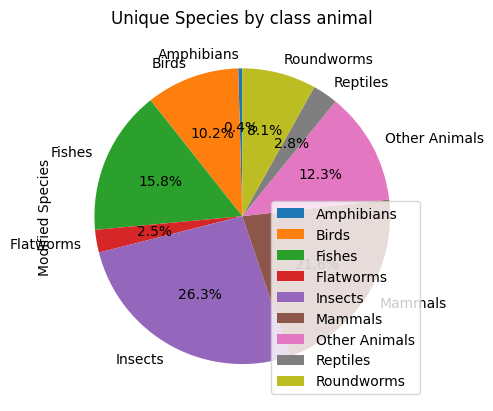

In [ ]:
# Create a panda pie plot using the dataframe above

# Your code here . . .


#lets create
plt.figure(figsize=(15, 15))

#automation
df_unique_species.set_index('Class').plot(kind='pie', y='Modified Species', autopct='%1.1f%%', startangle=90)

plt.title('Unique Species by class animal')

plt.show()